## 範例重點

* 知道如何在 Keras 中加入 dropout
* 了解 dropout 中 ratio 的意義與對訓練的影響

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import SGD
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def train_models(X_train, y_train, X_test, y_test, dropout_ratios, neuron_numbers=(512, 256, 128,),
                 epochs=50, batch_size=256, momentum=0.95, learning_rate=1e-3):
    train_histories = []
    for i, dropout_ratio in enumerate(dropout_ratios):
        print('Experiment with dropout ratio: {:.2f}'.format(dropout_ratio))
        backend.clear_session() # 清掉舊的 Graph
        model = build_model(X_train, X_train.shape[-1:], y_train.shape[-1], neuron_numbers, dropout_ratio)
        model.summary()
        model.compile(optimizer=SGD(lr=learning_rate, momentum=momentum, nesterov=True),
                      loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test,),
                  shuffle=True, verbose=2)
        train_histories.append(model.history)
    return train_histories

def build_model(x, input_shape, output_units, neuron_numbers, dropout_ratio):
    main_input = hidden_input = Input(shape=input_shape, name='main_input')
    for i, neuron_number in enumerate(neuron_numbers):
        hidden_input = Dense(units=neuron_number, activation='relu', name=f'hidden_layer{i}')(hidden_input)
        hidden_input = Dropout(dropout_ratio)(hidden_input)
    main_output = Dense(units=output_units, activation='softmax', name='main_output')(hidden_input)
    return Model(inputs=[main_input], outputs=[main_output])

def show_train_histories(train_histories, train_name, val_name, colors, dropout_ratios):
    plt.figure(figsize=(8, 6,))
    for i, train_history in enumerate(train_histories):
        show_train_history(train_history, train_name, val_name, colors[i], dropout_ratios[i])
    plt.xlabel('Epoch')
    plt.ylabel(train_name)
    plt.title('Train History')
    plt.legend()
    plt.show()

def show_train_history(train_history, train_name, val_name, color, dropout_ratio):
    plt.plot(train_history.history[train_name], '-', label='exp-dp-{:.2f}'.format(dropout_ratio), color=color)
    plt.plot(train_history.history[val_name], '--', label='exp-dp-{:.2f}'.format(dropout_ratio), color=color)

## 訓練模型

In [7]:
# 設定超參數
dropout_ratios = (0.1, 0.2, 0.3, 0.5,)

# 設定繪圖參數
colors = ['r', 'g', 'b', 'y']

In [8]:
train_histories = train_models(X_train, y_train, X_test, y_test, dropout_ratios)

Experiment with dropout ratio: 0.10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

Epoch 13/50
 - 11s - loss: 1.5874 - acc: 0.4369 - val_loss: 1.5074 - val_acc: 0.4638
Epoch 14/50
 - 11s - loss: 1.5688 - acc: 0.4401 - val_loss: 1.4944 - val_acc: 0.4684
Epoch 15/50
 - 12s - loss: 1.5572 - acc: 0.4476 - val_loss: 1.4861 - val_acc: 0.4741
Epoch 16/50
 - 12s - loss: 1.5437 - acc: 0.4514 - val_loss: 1.4713 - val_acc: 0.4823
Epoch 17/50
 - 11s - loss: 1.5279 - acc: 0.4556 - val_loss: 1.4645 - val_acc: 0.4845
Epoch 18/50
 - 11s - loss: 1.5131 - acc: 0.4612 - val_loss: 1.4501 - val_acc: 0.4914
Epoch 19/50
 - 11s - loss: 1.5007 - acc: 0.4646 - val_loss: 1.4375 - val_acc: 0.4899
Epoch 20/50
 - 11s - loss: 1.4892 - acc: 0.4705 - val_loss: 1.4360 - val_acc: 0.4895
Epoch 21/50
 - 11s - loss: 1.4770 - acc: 0.4756 - val_loss: 1.4214 - val_acc: 0.4995
Epoch 22/50
 - 11s - loss: 1.4683 - acc: 0.4755 - val_loss: 1.4153 - val_acc: 0.4990
Epoch 23/50
 - 11s - loss: 1.4579 - acc: 0.4816 - val_loss: 1.4062 - val_acc: 0.4999
Epoch 24/50
 - 11s - loss: 1.4443 - acc: 0.4859 - val_loss: 1.401

 - 12s - loss: 1.3867 - acc: 0.5037 - val_loss: 1.3577 - val_acc: 0.5162
Epoch 43/50
 - 12s - loss: 1.3800 - acc: 0.5085 - val_loss: 1.3440 - val_acc: 0.5235
Epoch 44/50
 - 12s - loss: 1.3719 - acc: 0.5106 - val_loss: 1.3426 - val_acc: 0.5211
Epoch 45/50
 - 12s - loss: 1.3658 - acc: 0.5146 - val_loss: 1.3471 - val_acc: 0.5196
Epoch 46/50
 - 11s - loss: 1.3567 - acc: 0.5139 - val_loss: 1.3387 - val_acc: 0.5173
Epoch 47/50
 - 11s - loss: 1.3475 - acc: 0.5181 - val_loss: 1.3457 - val_acc: 0.5181
Epoch 48/50
 - 11s - loss: 1.3493 - acc: 0.5175 - val_loss: 1.3349 - val_acc: 0.5240
Epoch 49/50
 - 11s - loss: 1.3480 - acc: 0.5206 - val_loss: 1.3316 - val_acc: 0.5226
Epoch 50/50
 - 11s - loss: 1.3407 - acc: 0.5226 - val_loss: 1.3240 - val_acc: 0.5286
Experiment with dropout ratio: 0.50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_____________

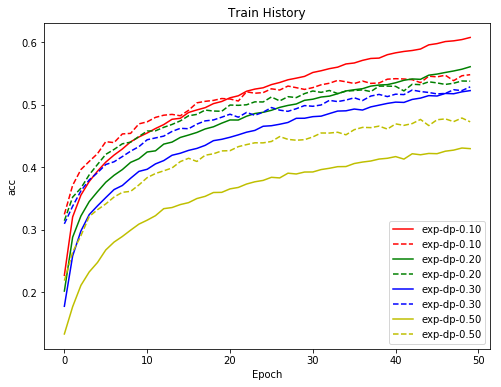

In [9]:
show_train_histories(train_histories, 'acc', 'val_acc', colors, dropout_ratios)

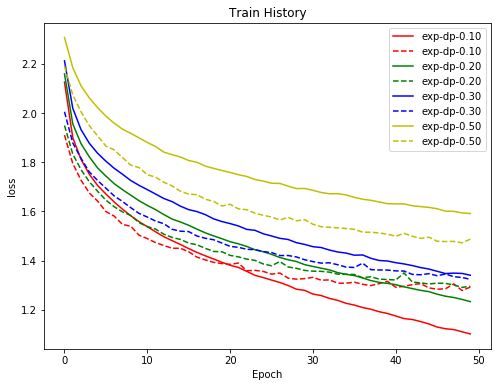

In [10]:
show_train_histories(train_histories, 'loss', 'val_loss', colors, dropout_ratios)

## 作業

1. 請比較使用不同層數以及不同 dropout ratio 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout ratio 檢視結果